In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,LSTM,GRU

<h1>Data Preparation</h1>

In [11]:
df=pd.read_csv("../Data.csv",index_col="Date")
df.index=pd.to_datetime(df.index)

In [12]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2015-02-09,26.766184,26.793012,26.477774,26.504604,155559200
2015-02-10,27.280405,27.309471,26.864560,26.866795,248034000
2015-02-11,27.919817,27.928760,27.387713,27.448077,294247200
2015-02-12,28.273066,28.501111,28.074086,28.183636,297898000
2015-02-13,28.411680,28.456394,28.091971,28.456394,217088800
...,...,...,...,...,...
2025-02-03,228.009995,231.830002,225.699997,229.990005,73063300
2025-02-04,232.800003,233.130005,226.649994,227.250000,45067300
2025-02-05,232.470001,232.669998,228.270004,228.529999,39620300


In [13]:
# Normalisation des prix
scaler = MinMaxScaler()
df['Scaled_Close'] = scaler.fit_transform(df[['Close']])

In [14]:
# Création des séquences pour le modèle RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [ ]:
seq_length = 10  
train_size=0.8

In [7]:
# Split data into train and test sets
train_data = df['Scaled_Close'].values[:int(len(df) * train_size)]
test_data = df['Scaled_Close'].values[int(len(df) * train_size):]

In [8]:
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

<h1>RNN</h1>

In [118]:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

c:\Users\tufai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [119]:
model.compile(optimizer='adam', loss='mse')

In [120]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0136
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.0204e-04
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.8069e-05
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.4838e-05
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.8266e-05
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0742e-04
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.4123e-05
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.5421e-05
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.3094e-05
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.6062e-05
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.5761e-05
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.0746e-05
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.7408e-05
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.0393e-05
Epoch 15/20
54/54 ━

In [121]:
train_predictions_rnn = model.predict(X_train)
test_predictions_rnn = model.predict(X_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [122]:
df['Predicted_Close_RNN'] = np.nan
train_index = df.index[seq_length:int(len(df) * train_size)]
test_index = df.index[int(len(df) * train_size) + seq_length:]

In [123]:
train_predictions_rnn = scaler.inverse_transform(train_predictions_rnn)
test_predictions_rnn = scaler.inverse_transform(test_predictions_rnn)

In [124]:
df.loc[train_index, 'Predicted_Close_RNN'] = train_predictions_rnn
df.loc[test_index, 'Predicted_Close_RNN'] = test_predictions_rnn

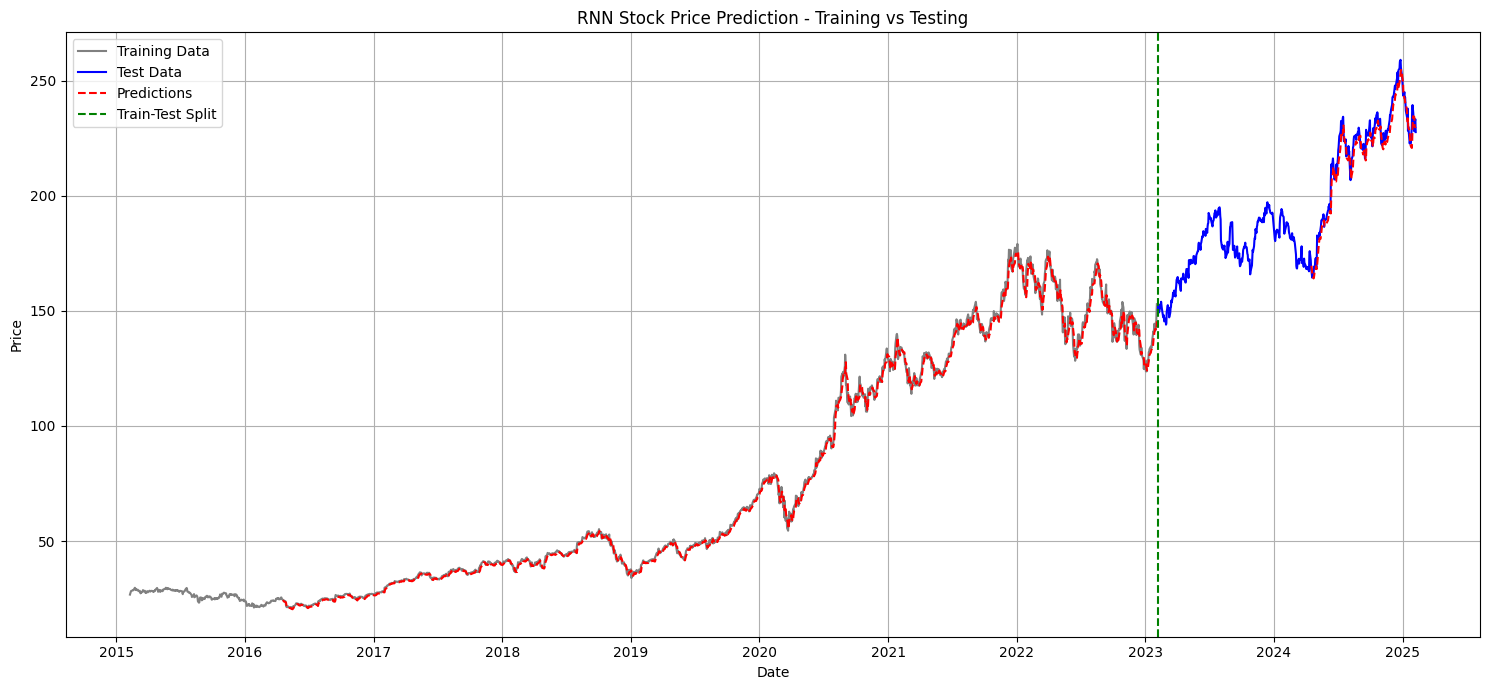

In [125]:
# Plotting
plt.figure(figsize=(15,7))

# Plot training data
plt.plot(df.index[:int(len(df) * train_size)], 
         df['Close'][:int(len(df) * train_size)], 
         label='Training Data', 
         color='gray')

# Plot test data
plt.plot(df.index[int(len(df) * train_size):], 
         df['Close'][int(len(df) * train_size):], 
         label='Test Data', 
         color='blue')
# Plot predictions
plt.plot(df.index[seq_length:], 
         df['Predicted_Close_RNN'][seq_length:], 
         label='Predictions', 
         color='red', 
         linestyle='--')

# Add vertical line to separate train and test sets
plt.axvline(x=df.index[int(len(df) * train_size)], 
            color='green', 
            linestyle='--', 
            label='Train-Test Split')
plt.legend()
plt.title("RNN Stock Price Prediction - Training vs Testing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

**Calculation et affichage des metrics de  performence**

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [127]:
def calculate_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    return mse, rmse, mae

In [128]:
train_actual = df['Close'][seq_length:int(len(df) * train_size)]
train_pred_rnn = df['Predicted_Close_RNN'][seq_length:int(len(df) * train_size)]
train_mse_rnn, train_rmse_rnn, train_mae_rnn = calculate_metrics(train_actual, train_pred_rnn)

In [129]:
test_actual = df['Close'][int(len(df) * train_size) + seq_length:]
test_pred_rnn = df['Predicted_Close_RNN'][int(len(df) * train_size) + seq_length:].dropna()
test_mse_rnn, test_rmse_rnn, test_mae_rnn = calculate_metrics(test_actual, test_pred_rnn)

In [130]:
print("\nTraining Set Metrics:")
print(f"MSE: {train_mse_rnn:.2f}")
print(f"RMSE: {train_rmse_rnn:.2f}")
print(f"MAE: {train_mae_rnn:.2f}")

print("\nTest Set Metrics:")
print(f"MSE: {test_mse_rnn:.2f}")
print(f"RMSE: {test_rmse_rnn:.2f}")
print(f"MAE: {test_mae_rnn:.2f}")


Training Set Metrics:
MSE: 4.84
RMSE: 2.20
MAE: 1.47

Test Set Metrics:
MSE: 22.22
RMSE: 4.71
MAE: 3.89


<h1>LSTM</h1>

In [131]:
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

c:\Users\tufai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [132]:
model_lstm.compile(optimizer='adam', loss='mse')

In [133]:
history_ltm = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    verbose=1
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0484
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 4.1249e-04
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.4254e-04
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.0258e-04
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 1.9216e-04
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.0093e-04
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 1.8845e-04
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 1.8909e-04
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 2.0071e-04
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 1.9040e-04
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.9163e-04
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 1.8031e-04
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 1.8210e-04
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 1.5391e-04
Epoch 15/20
54/54 ━

In [134]:
train_predictions_lstm = model_lstm.predict(X_train)
test_predictions_lstm = model_lstm.predict(X_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [135]:
df['Predicted_Close_LSTM'] = np.nan
train_index = df.index[seq_length:int(len(df) * train_size)]
test_index = df.index[int(len(df) * train_size) + seq_length:]

In [136]:
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
test_predictions_lstm = scaler.inverse_transform(test_predictions_lstm)

In [137]:
df.loc[train_index, 'Predicted_Close_LSTM'] = train_predictions_lstm
df.loc[test_index, 'Predicted_Close_LSTM'] = test_predictions_lstm

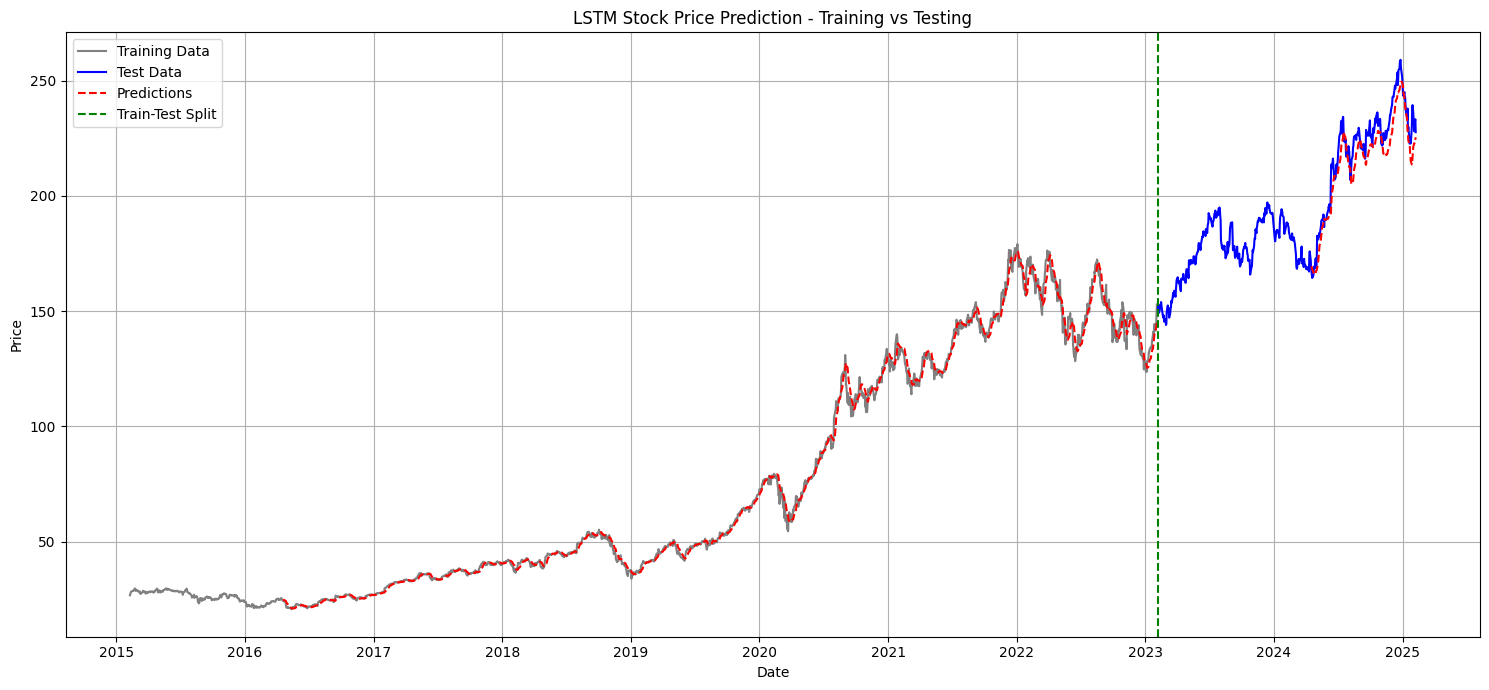

In [138]:
# Plotting
plt.figure(figsize=(15,7))

# Plot training data
plt.plot(df.index[:int(len(df) * train_size)], 
         df['Close'][:int(len(df) * train_size)], 
         label='Training Data', 
         color='gray')

# Plot test data
plt.plot(df.index[int(len(df) * train_size):], 
         df['Close'][int(len(df) * train_size):], 
         label='Test Data', 
         color='blue')
# Plot predictions
plt.plot(df.index[seq_length:], 
         df['Predicted_Close_LSTM'][seq_length:], 
         label='Predictions', 
         color='red', 
         linestyle='--')

# Add vertical line to separate train and test sets
plt.axvline(x=df.index[int(len(df) * train_size)], 
            color='green', 
            linestyle='--', 
            label='Train-Test Split')
plt.legend()
plt.title("LSTM Stock Price Prediction - Training vs Testing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [139]:
train_actual = df['Close'][seq_length:int(len(df) * train_size)]
train_pred_lstm = df['Predicted_Close_LSTM'][seq_length:int(len(df) * train_size)]
train_mse_lstm, train_rmse_lstm, train_mae_lstm = calculate_metrics(train_actual, train_pred_lstm)

In [140]:
test_actual = df['Close'][int(len(df) * train_size) + seq_length:]
test_pred_lstm = df['Predicted_Close_LSTM'][int(len(df) * train_size) + seq_length:]
test_mse_lstm, test_rmse_lstm, test_mae_lstm = calculate_metrics(test_actual, test_pred_lstm)

In [141]:
print("\nTraining Set Metrics:")
print(f"MSE: {train_mse_lstm:.2f}")
print(f"RMSE: {train_rmse_lstm:.2f}")
print(f"MAE: {train_mae_lstm:.2f}")

print("\nTest Set Metrics:")
print(f"MSE: {test_mse_lstm:.2f}")
print(f"RMSE: {test_rmse_lstm:.2f}")
print(f"MAE: {test_mae_lstm:.2f}")


Training Set Metrics:
MSE: 7.91
RMSE: 2.81
MAE: 1.81

Test Set Metrics:
MSE: 61.26
RMSE: 7.83
MAE: 6.39


<h1>On remarque que RNN simple a un meilleur score par rapport au LSTM</h1>

**visualization de la difference**

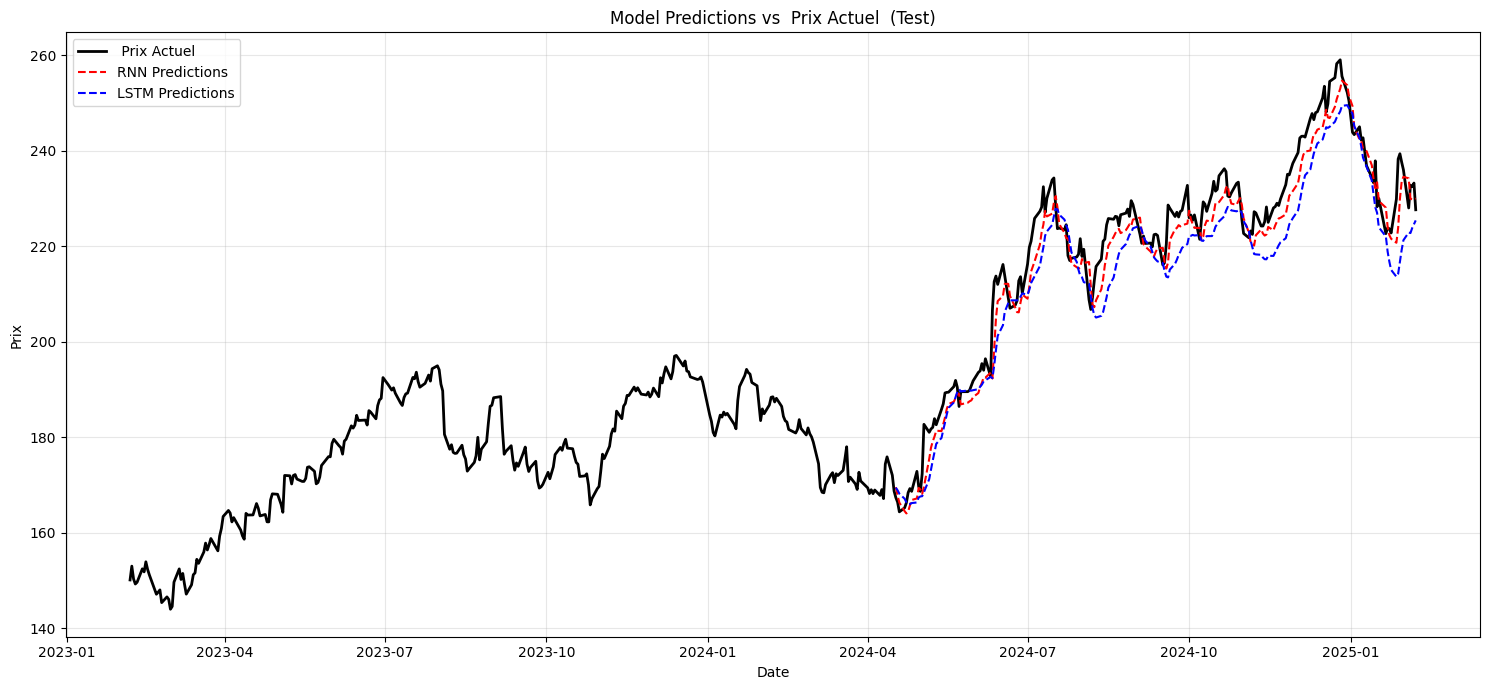

In [142]:
plt.figure(figsize=(15,7))

# Calculate test period start index
test_start_idx = int(len(df) * train_size)

# Plot actual test data
plt.plot(df.index[test_start_idx:], 
         df['Close'][test_start_idx:], 
         label=' Prix Actuel', 
         color='black',
         linewidth=2)

# Plot RNN predictions for test period only
plt.plot(df.index[test_start_idx:], 
         df['Predicted_Close_RNN'][test_start_idx:], 
         label='RNN Predictions', 
         color='red', 
         linestyle='--',
         linewidth=1.5)

# Plot LSTM predictions for test period only
plt.plot(df.index[test_start_idx:], 
         df['Predicted_Close_LSTM'][test_start_idx:], 
         label='LSTM Predictions', 
         color='blue',
         linestyle='--',
         linewidth=1.5)

plt.legend(loc='best')
plt.title("Model Predictions vs  Prix Actuel  (Test)")
plt.xlabel("Date")
plt.ylabel("Prix")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**on Testera un nouveau type de Model c'est GRU**

In [143]:

model = Sequential([
    GRU(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    
    Dense(1)
])

c:\Users\tufai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [144]:
model.compile(optimizer='adam', loss='mse')


In [145]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0573
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0420
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0438
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0415
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0424
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0421
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0440
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0417
Epoch 9/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0438
Epoch 10/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0422
Epoch 11/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0430
Epoch 12/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0444
Epoch 13/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0423
Epoch 14/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0421
Epoch 15/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0421
Epoc

In [149]:
train_predictions_GRU = model.predict(X_train)
test_predictions_GRU = model.predict(X_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [150]:
df['Predicted_Close_GRU'] = np.nan
train_index = df.index[seq_length:int(len(df) * train_size)]
test_index = df.index[int(len(df) * train_size) + seq_length:]

In [151]:
train_predictions_GRU = scaler.inverse_transform(train_predictions_GRU)
test_predictions_GRU = scaler.inverse_transform(test_predictions_GRU)

ValueError: Found array with dim 3. None expected <= 2.